# Goal:   find range of ybeam (in mm) to reconstruct scattered intensities

drange_narrow = [0.0, 0.015]  # ybeam unit   mm for reconstruction of scattering intensity

#### ybeam positive towards sample depth

recspot, depth = rec.interpolate(drange_narrow)



In [1]:
#----------- global imports -----------
import os, sys
import matplotlib as mpl
import matplotlib.pylab as mplp
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# lauetools path
path_to_lauetools = "/home/micha/LaueToolsPy3/LaueTools/"

print("Ajout de {} au PATH...".format(path_to_lauetools))

if path_to_lauetools not in sys.path:
    sys.path.insert(1, path_to_lauetools)


os.path.abspath(os.curdir)


Ajout de /home/micha/LaueToolsPy3/LaueTools/ au PATH...


'/home/micha/LaueToolsPy3/LaueTools/daxm/scripts'

In [2]:
def fig_slider(vol, axis=2):
    
    vol = np.array(vol)
    
    widget = widgets.IntSlider(min=0, max=vol.shape[axis]-1, step=1, value=0)
    
    mplp.figure()
    
    if axis==0:
        img0 = vol[0, :, :]
    elif axis==1:
        img0 = vol[:, 0, :]
    else:
        img0 = vol[:, :, 0]
    
    
    ax = mplp.imshow(img0, vmin=np.min(vol), vmax=np.mean(vol) + 3.*np.std(vol), origin="bottom")
    mplp.colorbar()
    
    def update_img(idx):
        if axis==0:
            img = vol[idx, :, :]
        elif axis==1:
            img = vol[:, idx, :]
        else:
            img = vol[:, :, idx]
        ax.set_data(img)
        
    return interact(update_img, idx=widget)

In [3]:
#----------- daxm imports -----------
from LaueTools.Daxm.classes.scan import new_scan
from LaueTools.Daxm.classes.source import new_source
from LaueTools.Daxm.classes.calibration import CalibManager
from LaueTools.Daxm.classes.reconstruction import SpotReconstructor

import LaueTools.Daxm.classes.scan as LTdcs
LTdcs.__file__


ERROR:hdf5plugin:Cannot initialize filter fcidecomp: File not found


-- OK! You are using python 3
CalibManager in init of classes/calibration <class 'daxm.classes.calibration.calib.CalibManager'>
CalibManager in init of classes/calibration <class 'LaueTools.Daxm.classes.calibration.calib.CalibManager'>


'/home/micha/LaueToolsPy3/LaueTools/daxm/classes/scan/__init__.py'

In [4]:
#----------- all directories -----------
analysis_dir = "/home/micha/LaueProjects/DAXMSept21/GeDAXM"
calib_dir = os.path.join(analysis_dir, "calibration")
recdir = os.path.join(analysis_dir, "reconstruction")
prefix = "GeDAXM"

#----------- useful parameters for several wire scans arrangement-----------

#xgrid = np.arange(-0.007, 0.008, 0.001)
#ygrid = np.arange(-0.004, 0.016, 0.002)

# for single depthprofile 
xgrid = np.array([0.,])
ygrid = np.array([0.,])


y_calib = 0


In [15]:
#----------- scan and calib -----------
#scan = new_scan(os.path.join(analysis_dir, prefix+".scan"))  # for mesh of wire scans
print('analysis_dir',analysis_dir)

#import LaueTools
#print('LT',LaueTools.__file__)


scan = new_scan(os.path.join(analysis_dir, prefix+"_calib.scan"))

#scan.set_verbosity(False)

calib = CalibManager(prefix+".calib", yref=y_calib, directory=calib_dir)

#
sample = new_source("Ge", 0.02)


analysis_dir /home/micha/LaueProjects/DAXMSept21/GeDAXM
/home/micha/LaueProjects/DAXMSept21/GeDAXM/GeDAXM_calib.scan 
#######     read .scan file  ############
[scan] Creating class instance...
[scan]  from dict.
[scan] - Reading spec...
[scan]    from file: /home/micha/LaueProjects/DAXMSept21/laue.01Sep21
[scan]    retrieving scan #28
[scan]    with command: ascan zf 1.300000 2.000000 700 0.900000
[scan]    scanning step is 1.00 um
[scan] - Retrieving image properties...
[scan]    framedim      : (2016, 2018)
[scan]    pixelsize     : 0.0734
[scan]    saturation    : 65535
[scan]    fliprot       : no
[scan]    header        : 3828
[scan]    formatdata    : uint16
[scan]    description   : file as produced by sCMOS camera with checked fliplr transform. CCD parameters read from tif header by fabio
[scan]    file_extension: tif
[scan]    offset        : 0.0
[scan] - Loading geometry parameters...
[scan]    distance : 79.526
[scan]    xcen     : 980.64
[scan]    ycen     : 932.85
[scan] 

in plot_image in point.py


<IPython.core.display.Javascript object>


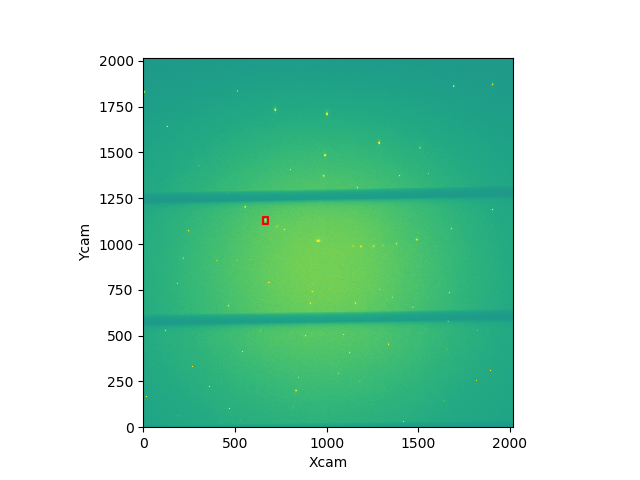

In [25]:
%matplotlib notebook

 # for mesh or line ( =  several point ) of wire scans
#scan.goto_centre()
#scan.goto(iy=0)

fig = scan.plot_image(0)

#----------- spot to analyse -----------
XYcam = [667, 1128]
halfboxsize = [15, 20]
E = 11

abscoeff = sample.calc_absorption(E)


# plot peak roi
mplp.plot([XYcam[0] - halfboxsize[0], XYcam[0] + halfboxsize[0],
           XYcam[0] + halfboxsize[0], XYcam[0] - halfboxsize[0],
           XYcam[0] - halfboxsize[0]],
          [XYcam[1] - halfboxsize[1], XYcam[1] - halfboxsize[1],
           XYcam[1] + halfboxsize[1], XYcam[1] + halfboxsize[1],
           XYcam[1] - halfboxsize[0]], 'r')


[scan]    from spec counter.


<IPython.core.display.Javascript object>


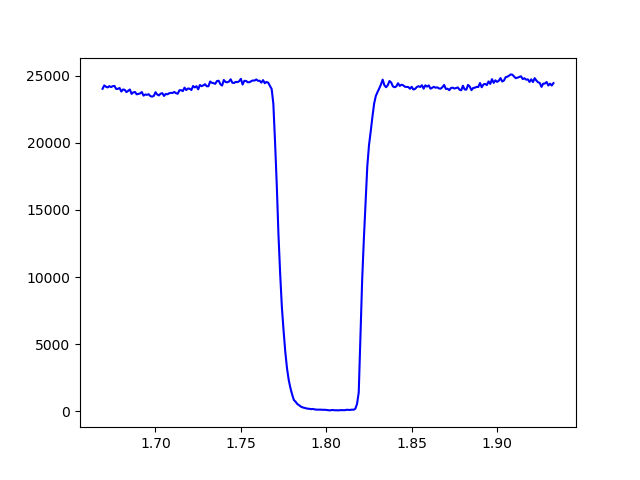

<IPython.core.display.Javascript object>


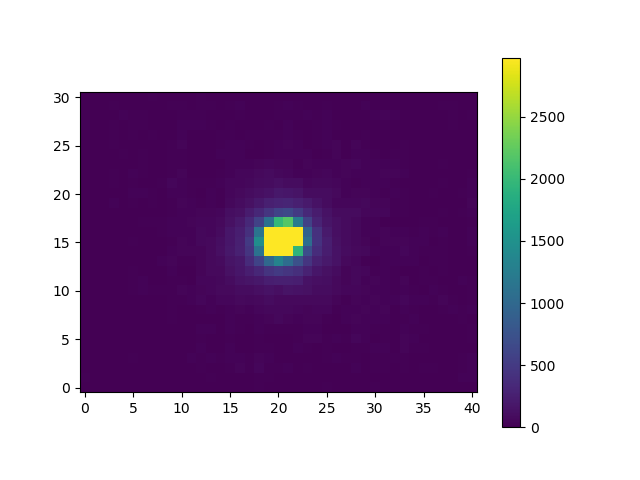

interactive(children=(IntSlider(value=0, description='idx', max=264), Output()), _dom_classes=('widget-interac…

<function __main__.fig_slider.<locals>.update_img(idx)>

In [26]:
#----------- Create reconstructor   (ybeam in microns) -----------
drange_large  = [-0.08, 0.1]   # for baseline

# if mesh or line of point (wire scan)
#scan.goto_centre()
#scan.goto(iy=0)
#scan.goto(iy=9)
#wire = calib.get_wires(ygrid[scan.get_current()[1]])

wire = calib.get_wires()



rec = SpotReconstructor(scan, XYcam, halfboxsize, drange_large, abscoeff, wire=wire)

#----------- BEFORE reconstruction  -----------
mplp.figure()
mplp.plot(rec.pw, np.max(rec.frames_cor, axis=(0,1,)), 'b')

fig_slider(rec.frames_cor)

In [27]:
#----------- Reconstruction --------!!! takes time !!!--
rec.reconstruct(regularize=False)
drange_narrow = [0.0, 0.015]  # ybeam unit   mm for reconstruction of scattering intensity

# ybeam positive towards sample depth


recspot, depth = rec.interpolate(drange_narrow)





<IPython.core.display.Javascript object>


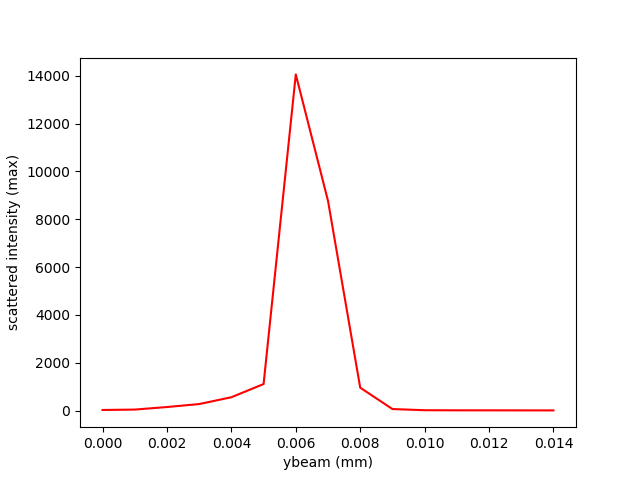

<IPython.core.display.Javascript object>


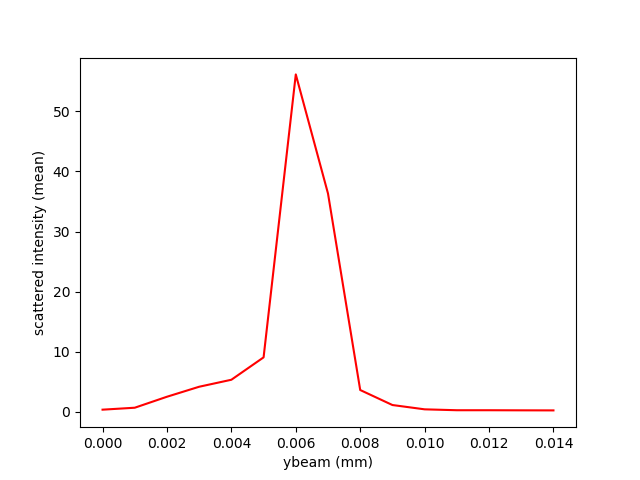

Text(0,0.5,'scattered intensity (mean)')

In [28]:
#----------- AFTER reconstruction -----------
fig = mplp.figure()
mplp.plot(depth, np.max(recspot, axis=(0,1,)), 'r')
ax = fig.gca()

ax.set_xlabel('ybeam (mm)')
ax.set_ylabel('scattered intensity (max)')


fig2 = mplp.figure()
mplp.plot(depth, np.mean(recspot, axis=(0,1,)), 'r')
ax2 = fig2.gca()
ax2.set_xlabel('ybeam (mm)')
ax2.set_ylabel('scattered intensity (mean)')


<IPython.core.display.Javascript object>


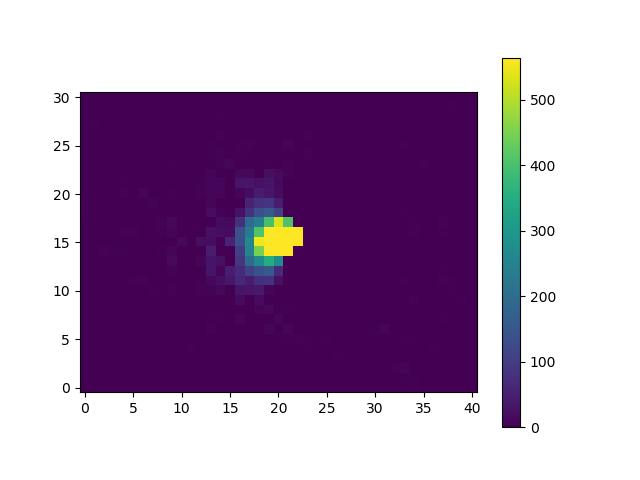

interactive(children=(IntSlider(value=0, description='idx', max=14), Output()), _dom_classes=('widget-interact…

<IPython.core.display.Javascript object>


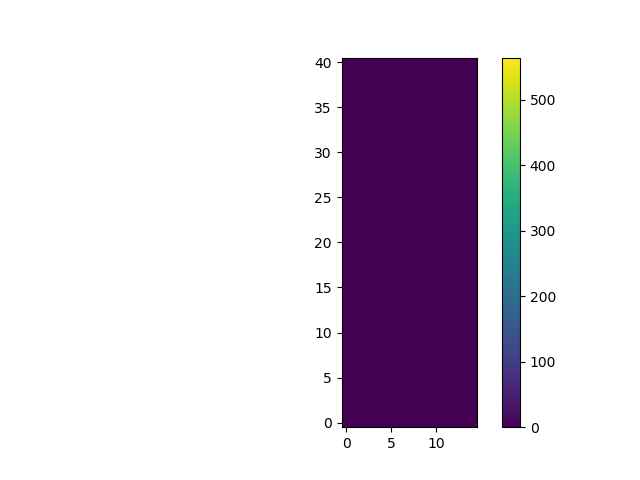

interactive(children=(IntSlider(value=0, description='idx', max=30), Output()), _dom_classes=('widget-interact…

<IPython.core.display.Javascript object>


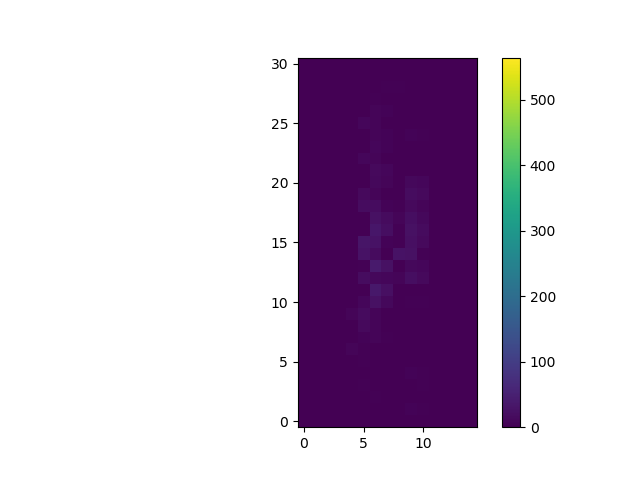

interactive(children=(IntSlider(value=0, description='idx', max=40), Output()), _dom_classes=('widget-interact…

<function __main__.fig_slider.<locals>.update_img(idx)>

In [29]:
# verti halfboxsize[0] ,  horizontal halfboxsize[1] pixel
# slider     idx  = micron  drange narrow
fig_slider(recspot)

# vertical  pixel  halfboxsize[1], horizontal idx  = micron  drange narrow

fig_slider(recspot, axis=0)

# vertical  pixel  halfboxsize[0], horizontal idx  = micron  drange narrow

fig_slider(recspot, axis=1)


In [30]:
print('drange_large=',drange_large)
print('drange_narrow=',drange_narrow)

drange_large= [-0.08, 0.1]
drange_narrow= [0.0, 0.015]
